In [30]:
# 1. Importing the required libraries for EDA
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [39]:
# 2. Loading the data into the DataFrame
df = pd.read_csv("../data/data_for_EDA.csv", index_col=0)
# Display the top 5 rows 
df.head()

,name,distance,rating,price
0,Coffee & Whisky House,603,8.8,3.0
1,Coffee & Whisky House,832,8.8,3.0
2,Coffee & Whisky House,603,8.8,3.0
3,Coffee & Whisky House,229,8.8,3.0
4,Coffee & Whisky House,229,8.8,3.0


In [40]:
# 3. Checking the types of data
df.dtypes

name         object
distance      int64
rating      float64
price       float64
dtype: object

In [41]:
# 4. Dropping irrelevant columns
df = df.drop(['name'], axis=1)
df.head()

,distance,rating,price
0,603,8.8,3.0
1,832,8.8,3.0
2,603,8.8,3.0
3,229,8.8,3.0
4,229,8.8,3.0


In [43]:
# 5. Renaming the columns
# df = df.rename(columns={"Column_Name": "New_Name"})
# df.head()

In [61]:
# 6. Dropping the duplicate rows
print(f'DataFrame before dropping duplicates {df.shape}')
duplicates_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicates_df.shape)
# Count the number of rows
print('Count of rows:\n', df.count())
df = df.drop_duplicates()
df.head()

DataFrame before dropping duplicates (465, 3)
Number of duplicate rows: (0, 3)
Count of rows:
 distance    465
rating      172
price       298
dtype: int64


,distance,rating,price
0,603,8.8,3.0
1,832,8.8,3.0
3,229,8.8,3.0
6,852,8.8,3.0
7,211,8.8,3.0


In [62]:
print('Count of rows:\n', df.count())

Count of rows:
 distance    465
rating      172
price       298
dtype: int64


In [65]:
# 7. Dropping the missing or null values
print('Count of rows:\n', df.count())

Count of rows:
 distance    128
rating      128
price       128
dtype: int64


In [68]:
# Dropping the missing values.
df = df.dropna()
print(df.count())
# After dropping the values
print('Count of nulls:\n', df.isnull().sum())

distance    128
rating      128
price       128
dtype: int64
Count of nulls:
 distance    0
rating      0
price       0
dtype: int64


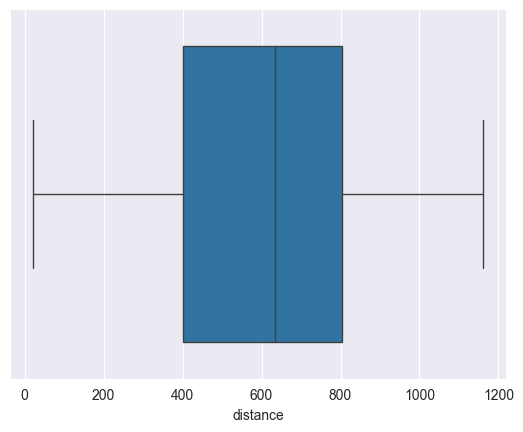

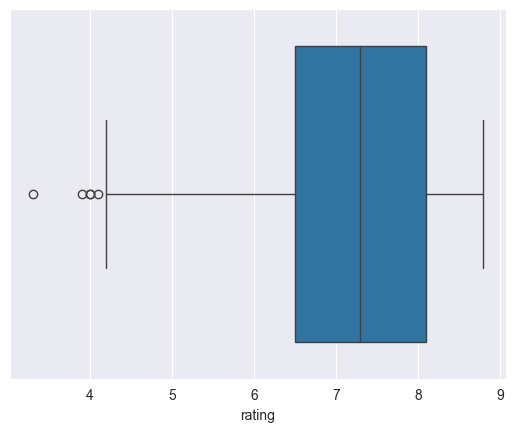

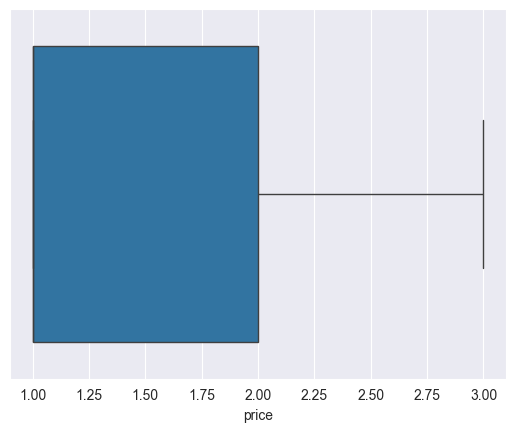

In [75]:
# 8. Detecting Outliers
sns.boxplot(x=df['distance'])
plt.show()
sns.boxplot(x=df['rating'])
plt.show()
sns.boxplot(x=df['price'])
plt.show()

In [77]:
# Standard Deviation
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('IQR:\n', IQR)

IQR:
 distance    402.25
rating        1.60
price         1.00
dtype: float64


In [79]:
# Remove outliers 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'DataFrame after dropping outliers {df.shape}')

DataFrame after dropping outliers (123, 3)


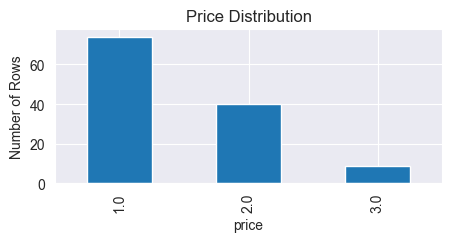

In [87]:
# 9. Plot different features against one another (scatter), 
# against frequency (histogram)
df['price'].value_counts().plot(kind='bar', figsize=(5, 2))
plt.title("Price Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('price');

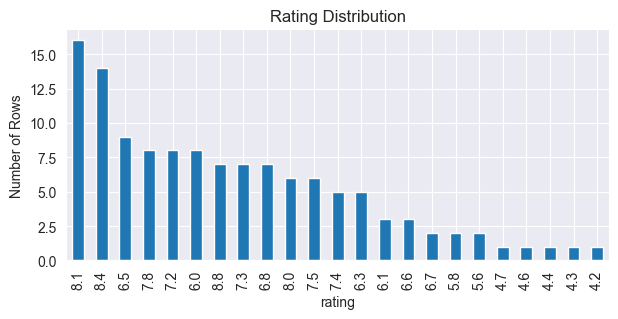

In [90]:
df['rating'].value_counts().plot(kind='bar', figsize=(7, 3))
plt.title("Rating Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('rating');

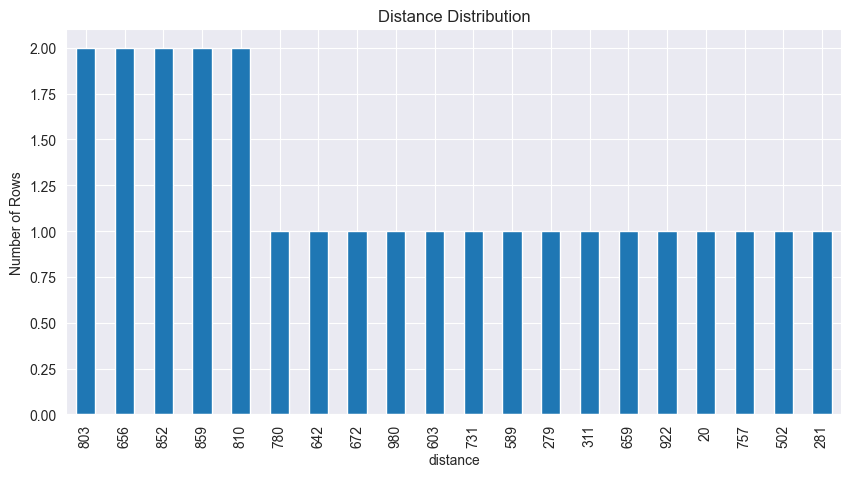

In [109]:
df['distance'].value_counts().nlargest(20).plot(kind='bar', figsize=(10, 5))
plt.title("Distance Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('distance');

          const  distance    rating     price
const       NaN       NaN       NaN       NaN
distance    NaN  1.000000 -0.012844  0.124247
rating      NaN -0.012844  1.000000  0.293197
price       NaN  0.124247  0.293197  1.000000


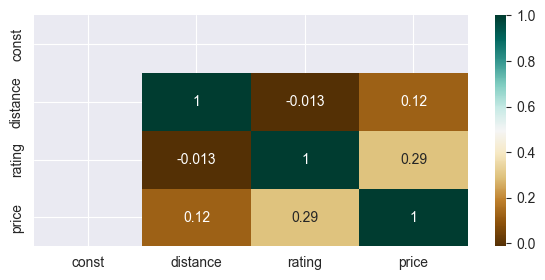

In [110]:
# Heat Maps
plt.figure(figsize=(7, 3))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
print(c)


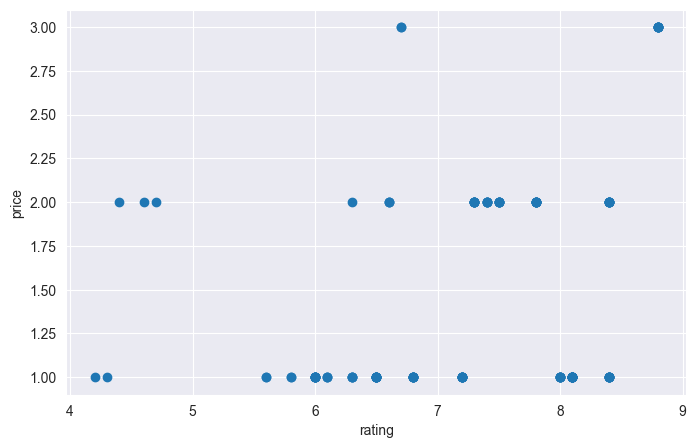

In [105]:
# Scatterplot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df['rating'], df['price'])
ax.set_xlabel('rating')
ax.set_ylabel('price')
plt.show()

### Build a regression model.

In [115]:
# Example: Adding a constant column for regression analysis
df = sm.add_constant(df)
df.drop('const', axis=1, inplace=True)
# Display the first few rows
# pri nt(dat.head())

Provide model output and an interpretation of the results. 

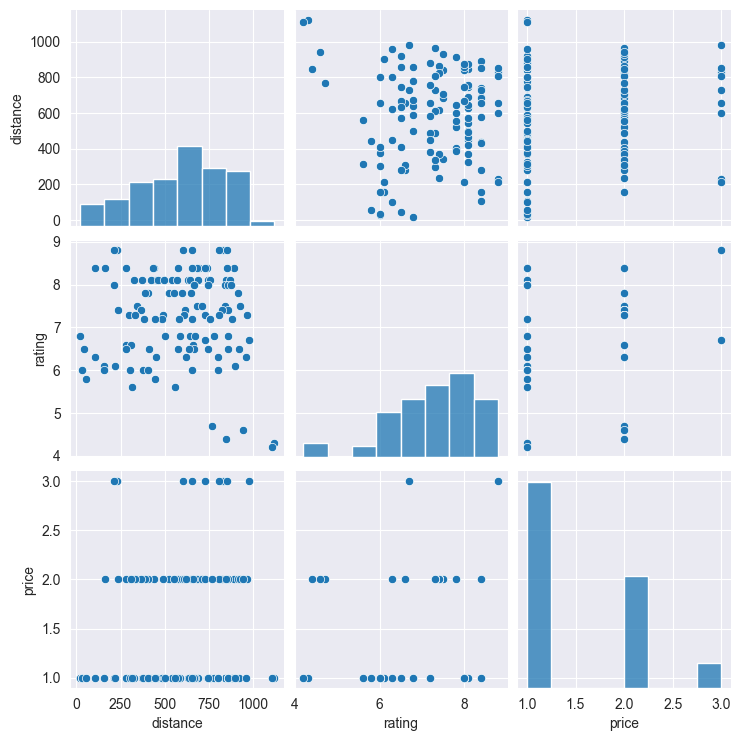

In [117]:
sns.pairplot(data=df)
plt.show()

In [118]:
df.corr(numeric_only=True)

,distance,rating,price
distance,1.000000,-0.012844,0.124247
rating,-0.012844,1.000000,0.293197
price,0.124247,0.293197,1.000000


In [119]:
import scipy

stat, p1 = scipy.stats.pearsonr(df['price'], df['rating'])
stat, p2 = scipy.stats.pearsonr(df['price'], df['distance'])
stat, p3 = scipy.stats.pearsonr(df['rating'], df['distance'])
print(p1, p2, p3)

0.0009978028714126921 0.17093404264668424 0.8878723028136037


# Stretch

How can you turn the regression model into a classification model?